In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## AR過程のデータを作成する
データを生成するための関数を用意します

In [2]:
def create_ARdata(phis=[0.1], N=500, init=1, c=1, sigma=0.3):
    """AR過程のデータを作成する"""
    print(f"==AR({len(phis)})過程の長さ{N}のデータを作成==")
    data = np.zeros(N)
    data[0] = init + np.random.normal(0, sigma)

    for t in range(2, N):
        res = c + np.random.normal(0, sigma)
        for j, phi_j in enumerate(phis):
            res += phi_j * data[t - j - 1]
        data[t] = res
    return data

### 係数が1より小さい場合

==AR(1)過程の長さ500のデータを作成==


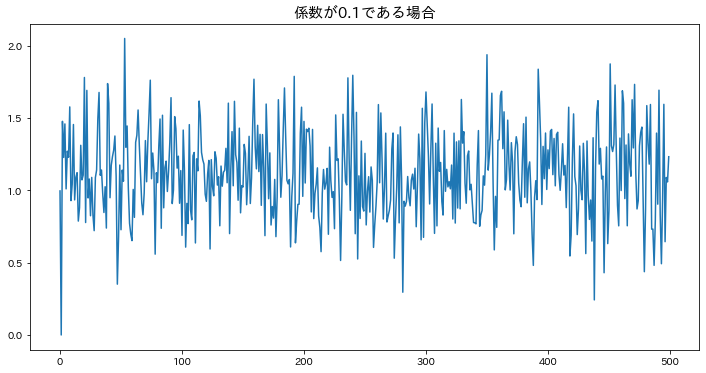

In [3]:
plt.figure(figsize=(12, 6))
phis = [0.1]
ar1_1 = create_ARdata(phis=phis)
plt.plot(ar1_1)
plt.title(f"係数が{phis[0]}である場合", fontsize=15)
plt.show()

### 係数が１である場合

==AR(1)過程の長さ500のデータを作成==


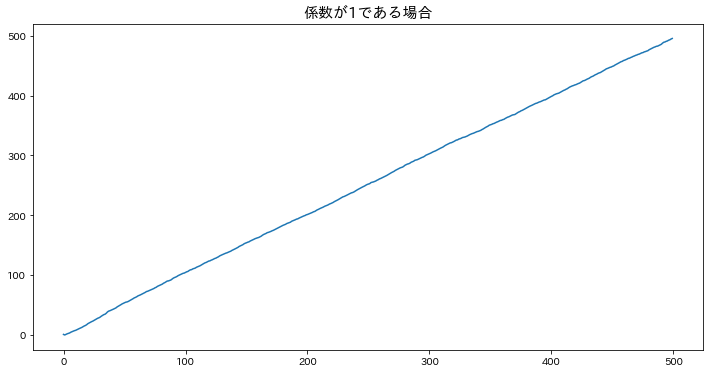

In [4]:
plt.figure(figsize=(12, 6))
phis = [1]
ar1_2 = create_ARdata(phis=phis)
plt.plot(ar1_2)
plt.title(f"係数が{phis[0]}である場合", fontsize=15)
plt.show()

### 係数が１より大きい場合

==AR(1)過程の長さ500のデータを作成==


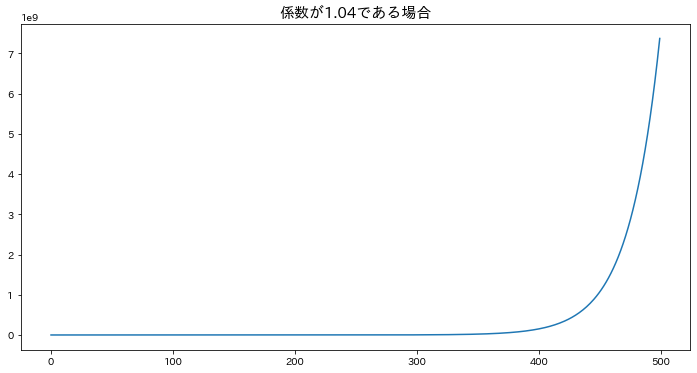

In [5]:
plt.figure(figsize=(12, 6))
phis = [1.04]
ar1_2 = create_ARdata(phis=phis)
plt.plot(ar1_2)
plt.title(f"係数が{phis[0]}である場合", fontsize=15)
plt.show()

## AR(2)

==AR(2)過程の長さ100のデータを作成==


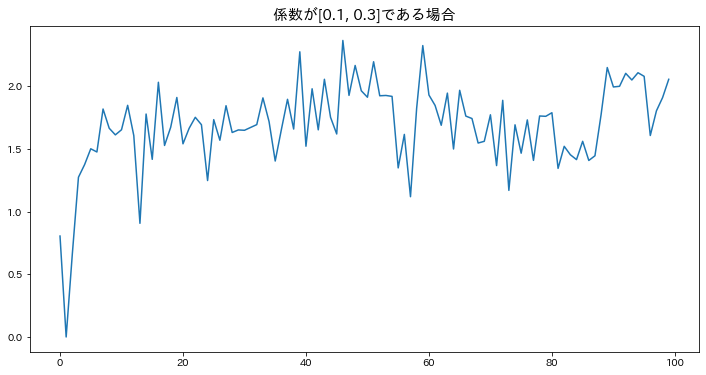

In [6]:
plt.figure(figsize=(12, 6))
phis = [0.1, 0.3]
ar2_1 = create_ARdata(phis=phis, N=100)
plt.plot(ar2_1)
plt.title(f"係数が{phis}である場合", fontsize=15)
plt.show()

==AR(2)過程の長さ500のデータを作成==


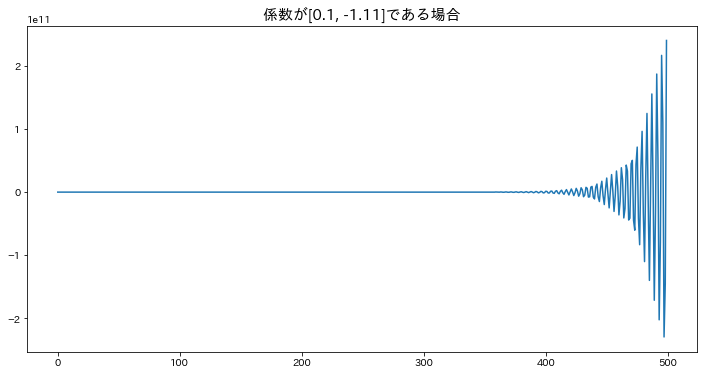

In [7]:
plt.figure(figsize=(12, 6))
phis = [0.1, -1.11]
ar2_1 = create_ARdata(phis=phis)
plt.plot(ar2_1)
plt.title(f"係数が{phis}である場合", fontsize=15)
plt.show()

## モデルの推定

In [8]:
from statsmodels.tsa.ar_model import AutoReg

res = AutoReg(ar1_1, lags=1).fit()

out = "AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}"
print(out.format(res.aic, res.hqic, res.bic))

AIC: 231.486, HQIC: 236.445, BIC: 244.124


In [9]:
print(res.params)
print(res.sigma2)
res.summary()

[1.03832755 0.07236388]
0.09199676371696269


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(1)   Log Likelihood                -112.743
Method:               Conditional MLE   S.D. of innovations              0.303
Date:                Sat, 13 Aug 2022   AIC                            231.486
Time:                        01:55:17   BIC                            244.124
Sample:                             1   HQIC                           236.445
                                  500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0383      0.052     20.059      0.000       0.937       1.140
y.L1           0.0724      0.045      1.621      0.105      -0.015       0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           13.8190           +0.0000j           13.8190            0.0000
-----------------------------------------------------------------------------
"""